<a href="https://colab.research.google.com/github/PankajBGadge/Cardiovascular-Risk-Prediction/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
Netflix_dataset=pd.read_csv('/content/drive/MyDrive/Netflix Movies and TV Shows Clustering-Pankaj Gadge/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

In [4]:
Netflix_dataset.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [5]:
Netflix_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


From the info, we know that there are 6,234 entries and 12 columns to work with for this EDA. There are a few columns that contain null values, “director,” “cast,” “country,” “date_added,” “rating.”

There are a total of 3,036 null values across the entire dataset with 1,969 missing points under “director” 570 under “cast,” 476 under “country,” 11 under “date_added,” and 10 under “rating.” We will have to handle all null data points before we can dive into EDA and modeling.

In [6]:
Netflix_dataset.director.fillna("No Director", inplace=True)
Netflix_dataset.cast.fillna("No Cast", inplace=True)
Netflix_dataset.country.fillna("Country Unavailable", inplace=True)
Netflix_dataset.dropna(subset=["date_added", "rating"], inplace=True)

The easiest way to get rid of them would be to delete the rows with the missing data for missing values. However, this wouldn’t be beneficial to our EDA since it is a loss of information. Since “director,” “cast,” and “country” contain the majority of null values, we chose to treat each missing value is unavailable. The other two label “date_added” and “rating” contain an insignificant portion of the data, so it drops from the dataset. Finally, we can see that there are no more missing values in the data frame.

In [7]:
Netflix_dataset.isnull().any()

show_id         False
type            False
title           False
director        False
cast            False
country         False
date_added      False
release_year    False
rating          False
duration        False
listed_in       False
description     False
dtype: bool

In [8]:
Netflix_dataset.describe()

,release_year
count,7770.000000
mean,2013.935393
std,8.764357
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


# **Splitting Dataset**

In [9]:
netflix_movies = Netflix_dataset[Netflix_dataset['type']=='Movie'].copy()
netflix_movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ..."


In [10]:
netflix_shows = Netflix_dataset[Netflix_dataset['type']=='TV Show'].copy()
netflix_shows.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,No Director,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...
11,s12,TV Show,1983,No Director,"Robert Więckiewicz, Maciej Musiał, Michalina O...","Poland, United States","November 30, 2018",2018,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","In this dark alt-history thriller, a naïve law..."
12,s13,TV Show,1994,Diego Enrique Osorno,No Cast,Mexico,"May 17, 2019",2019,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...",Archival video and new interviews examine Mexi...
16,s17,TV Show,Feb-09,No Director,"Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...",Country Unavailable,"March 20, 2019",2018,TV-14,1 Season,"International TV Shows, TV Dramas","As a psychology professor faces Alzheimer's, h..."


# **Text Processing**

In [11]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [12]:
import string
from nltk.corpus import stopwords

In [13]:
[punc for punc in string.punctuation]

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~']

In [14]:
def text_process(msg):
    nopunc =[char for char in msg if char not in string.punctuation]
    nopunc=''.join(nopunc)
    return ' '.join([word for word in nopunc.split() if word.lower() not in stopwords.words('english')])

In [15]:
Netflix_dataset['title'] = Netflix_dataset['title'].apply(text_process)
Netflix_dataset['listed_in'] = Netflix_dataset['listed_in'].apply(text_process)
Netflix_dataset['cast'] = Netflix_dataset['cast'].apply(text_process)
Netflix_dataset['description'] = Netflix_dataset['description'].apply(text_process)

In [16]:
Netflix_dataset.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3,No Director,João Miguel Bianca Comparato Michel Gomes Rodo...,Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,International TV Shows TV Dramas TV SciFi Fantasy,future elite inhabit island paradise far crowd...
1,s2,Movie,719,Jorge Michel Grau,Demián Bichir Héctor Bonilla Oscar Serrano Aza...,Mexico,"December 23, 2016",2016,TV-MA,93 min,Dramas International Movies,devastating earthquake hits Mexico City trappe...
2,s3,Movie,2359,Gilbert Chan,Tedd Chan Stella Chung Henley Hii Lawrence Koh...,Singapore,"December 20, 2018",2011,R,78 min,Horror Movies International Movies,army recruit found dead fellow soldiers forced...
3,s4,Movie,9,Shane Acker,Elijah Wood John C Reilly Jennifer Connelly Ch...,United States,"November 16, 2017",2009,PG-13,80 min,Action Adventure Independent Movies SciFi Fantasy,postapocalyptic world ragdoll robots hide fear...
4,s5,Movie,21,Robert Luketic,Jim Sturgess Kevin Spacey Kate Bosworth Aaron ...,United States,"January 1, 2020",2008,PG-13,123 min,Dramas,brilliant group students become cardcounting e...


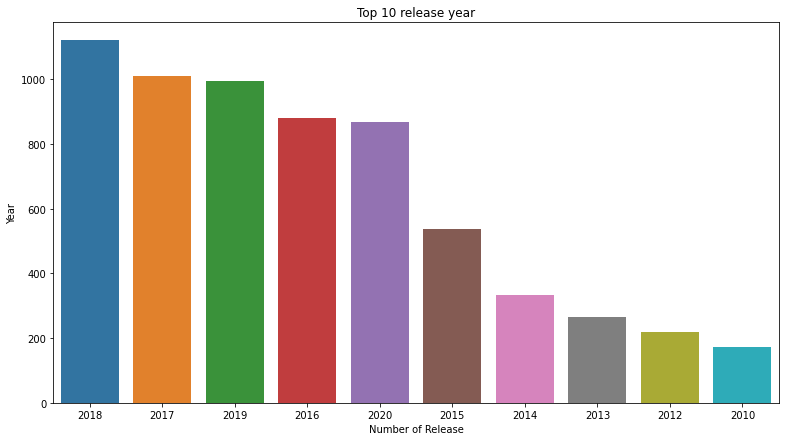

In [17]:
plt.figure(figsize=(13,7))
g = sns.countplot(x = Netflix_dataset['release_year'], order=Netflix_dataset['release_year'].value_counts().index[:10])
plt.title('Top 10 release year')
plt.xlabel('Number of Release')
plt.ylabel('Year')
plt.show()

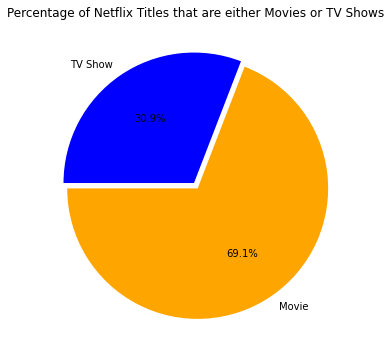

In [18]:
plt.figure(figsize=(6,6))
plt.title('Percentage of Netflix Titles that are either Movies or TV Shows')
plt.pie(Netflix_dataset.type.value_counts(),explode=(0.025,0.025), labels=Netflix_dataset.type.value_counts().index, colors=['orange','blue'],autopct='%1.1f%%', startangle=180)
plt.show()

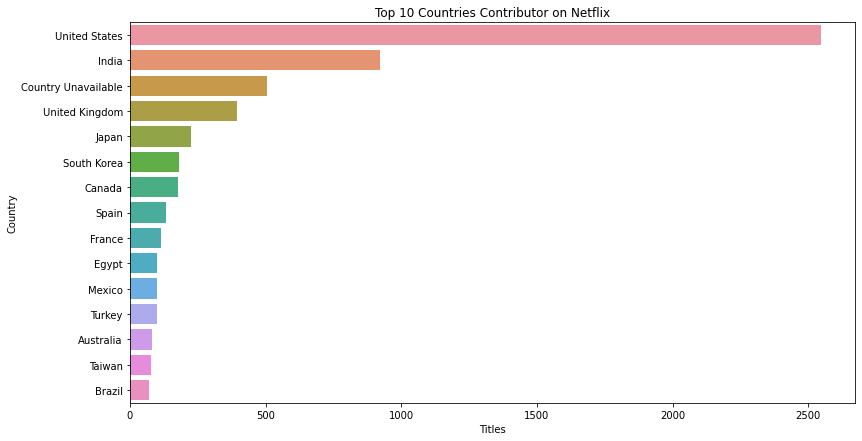

In [19]:
plt.figure(figsize=(13,7))
g = sns.countplot(y = Netflix_dataset['country'], order=Netflix_dataset['country'].value_counts().index[:15])
plt.title('Top 10 Countries Contributor on Netflix')
plt.xlabel('Titles')
plt.ylabel('Country')
plt.show()

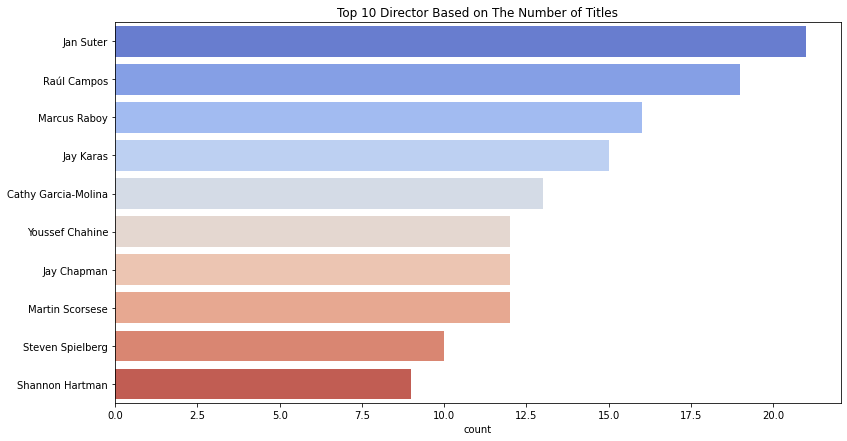

In [20]:
filtered_directors = Netflix_dataset[Netflix_dataset.director != 'No Director'].set_index('title').director.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(13,7))
plt.title('Top 10 Director Based on The Number of Titles')
sns.countplot(y = filtered_directors, order=filtered_directors.value_counts().index[:10], palette='coolwarm')
plt.show()

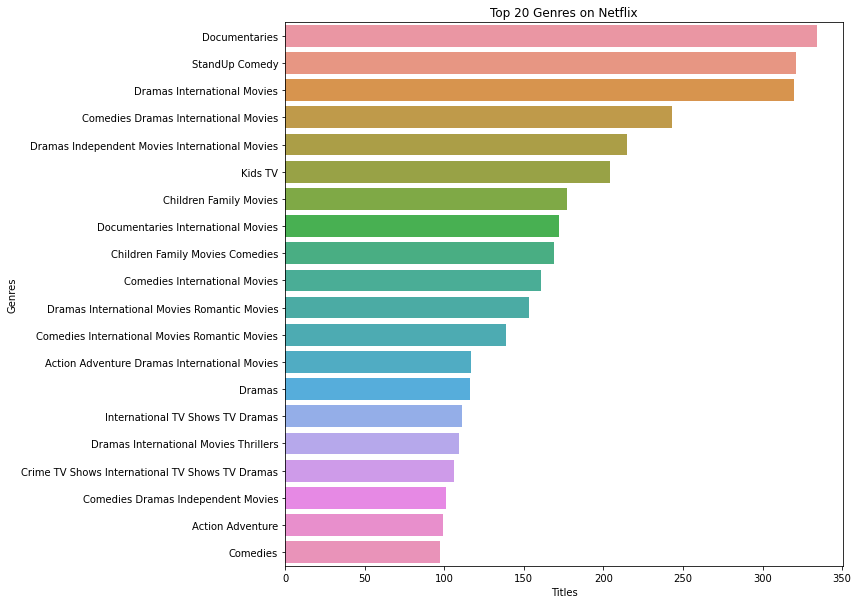

In [21]:
filtered_genres = Netflix_dataset.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
plt.figure(figsize=(10,10))
g = sns.countplot(y = filtered_genres,order=filtered_genres.value_counts().index[:20])
plt.title('Top 20 Genres on Netflix')
plt.xlabel('Titles')
plt.ylabel('Genres')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


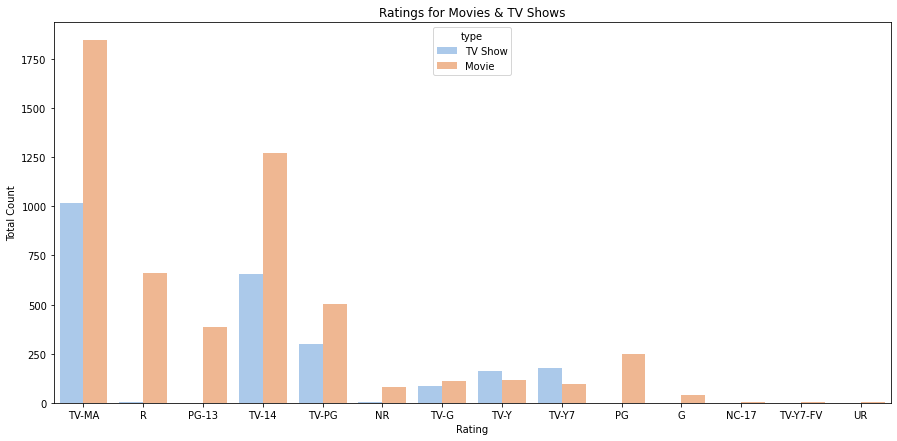

In [22]:
plt.figure(figsize=(15,7))
g = sns.countplot(Netflix_dataset.rating, hue=Netflix_dataset.type, palette="pastel");
plt.title("Ratings for Movies & TV Shows")
plt.xlabel("Rating")
plt.ylabel("Total Count")
plt.show()

the largest count of TV shows is made with a “TV-MA” rating. “TV-MA” is a rating assigned by the TV Parental Guidelines to a television program designed for mature audiences only.

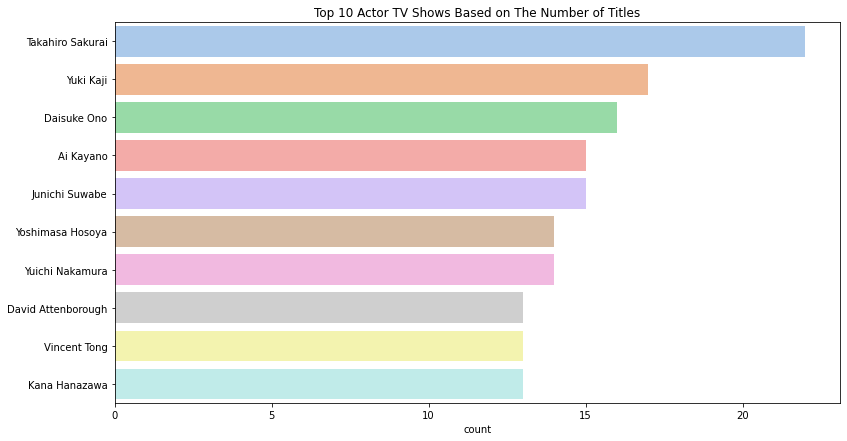

In [23]:
filtered_cast_shows = netflix_shows[netflix_shows.cast != 'No Cast'].set_index('title').cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(13,7))
plt.title('Top 10 Actor TV Shows Based on The Number of Titles')
sns.countplot(y = filtered_cast_shows, order=filtered_cast_shows.value_counts().index[:10], palette='pastel')
plt.show()

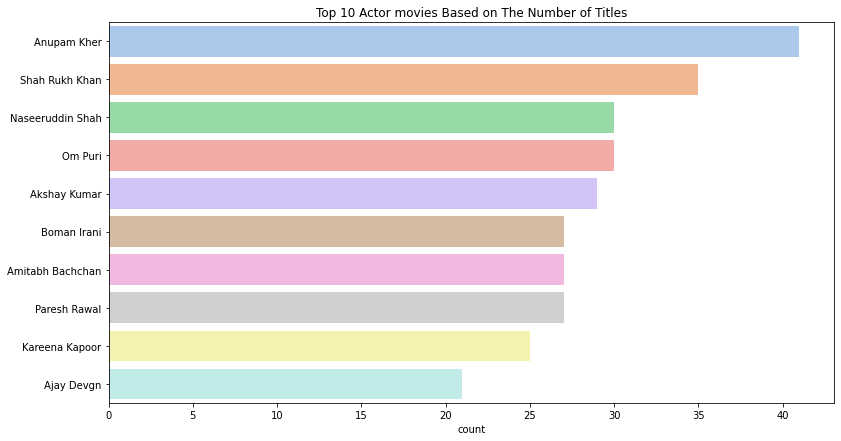

In [24]:
filtered_cast_movies = netflix_movies[netflix_movies.cast != 'No Cast'].set_index('title').cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(13,7))
plt.title('Top 10 Actor movies Based on The Number of Titles')
sns.countplot(y = filtered_cast_movies, order=filtered_cast_movies.value_counts().index[:10], palette='pastel')
plt.show()

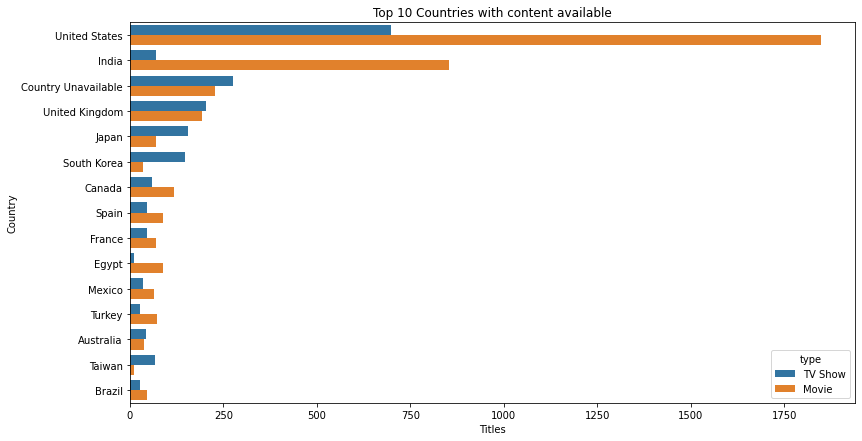

In [32]:
filtered_genres = Netflix_dataset.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
plt.figure(figsize=(13,7))
g = sns.countplot(y = Netflix_dataset['country'], hue=Netflix_dataset['type'],order=Netflix_dataset['country'].value_counts().index[:15])
plt.title('Top 10 Countries with content available')
plt.xlabel('Titles')
plt.ylabel('Country')
plt.show()

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [85]:
#Applying Tfidf Vectorizer
tfidfmodel = TfidfVectorizer(max_features=5000)
X_tfidf = tfidfmodel.fit_transform(Netflix_dataset['description'])
X_tfidf.shape

(7770, 5000)

In [88]:
vectorizer = TfidfVectorizer()

X = vectorizer.fit_transform(Netflix_dataset)

In [89]:
X.shape

(12, 12)

In [64]:
type(X)

scipy.sparse.csr.csr_matrix

In [65]:
# convert X into array form for clustering
X = X.toarray()

In [42]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [43]:
kmeans = KMeans( init="k-means++", n_clusters=8, max_iter=300,   random_state=0)

In [44]:
from yellowbrick.cluster import KElbowVisualizer

KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f4287065d10>,
                 estimator=KMeans(n_clusters=9, random_state=0), k=(2, 10),
                 locate_elbow=False, timings=False)

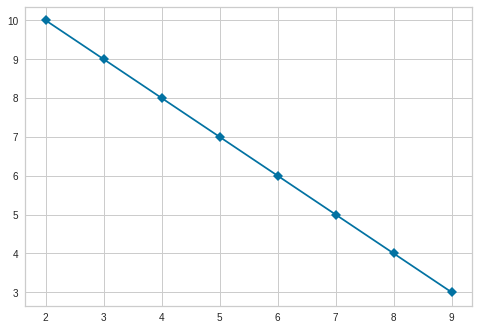

In [46]:
visualizer = KElbowVisualizer(kmeans, k=(2,10), metric= 'distortion', timings= False, locate_elbow= False)
visualizer.fit(X)

In [48]:
import numpy as np

KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f4287090890>,
                 estimator=KMeans(n_clusters=9, random_state=0), k=(2, 10),
                 metric='silhouette', timings=False)

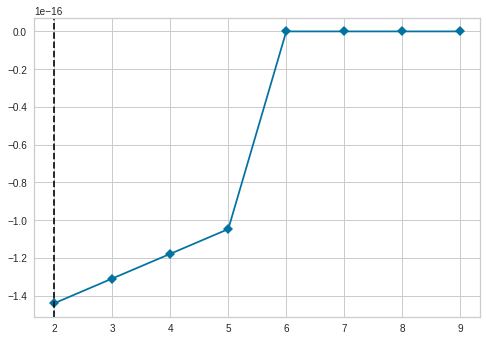

In [49]:
# trying Silhoutte Score
visualizer = KElbowVisualizer(kmeans, k=(2,10), metric='silhouette', timings=False, locate_elbow=True)
visualizer.fit(X)

In [53]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer

In [54]:
from sklearn.metrics import silhouette_score, silhouette_samples

def silhouette_score_analysis(n):

  for n_clusters in range(2,n):
      km = KMeans (n_clusters=n_clusters)
      preds = km.fit_predict(X)
      centers = km.cluster_centers_

      score = silhouette_score(X, preds, metric='euclidean')
      print ("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

      visualizer = SilhouetteVisualizer(km)

      visualizer.fit(X) # Fit the training data to the visualizer
      visualizer.poof() # Draw/show/poof the data

For n_clusters = 2, silhouette score is -1.4392514204601266e-16


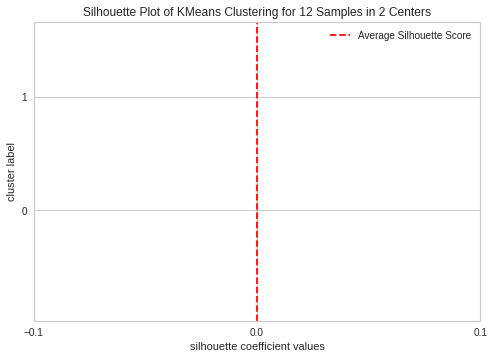

For n_clusters = 3, silhouette score is -1.3084103822364788e-16


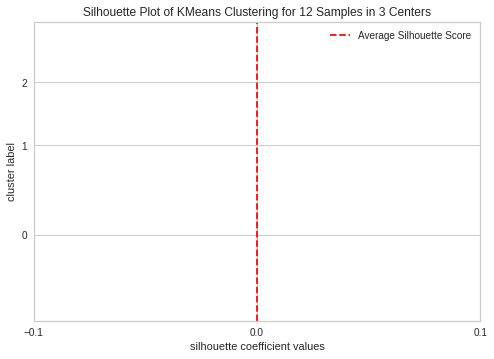

For n_clusters = 4, silhouette score is -1.1775693440128307e-16


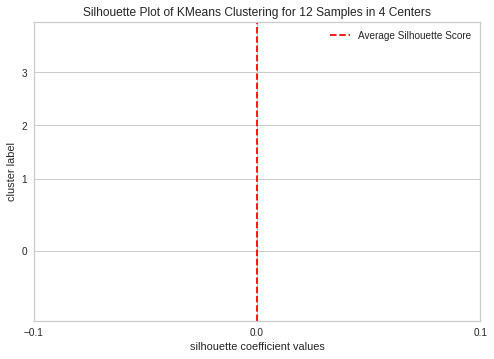

For n_clusters = 5, silhouette score is -1.046728305789183e-16


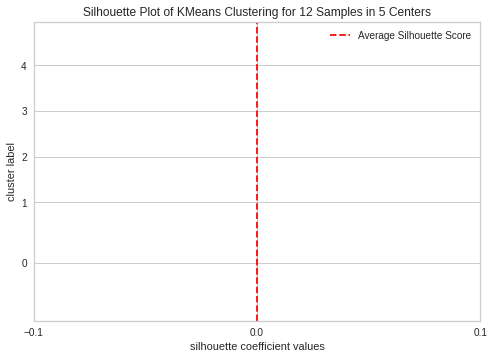

For n_clusters = 6, silhouette score is 0.0


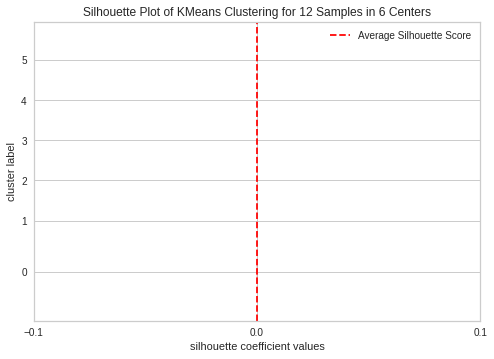

For n_clusters = 7, silhouette score is 0.0


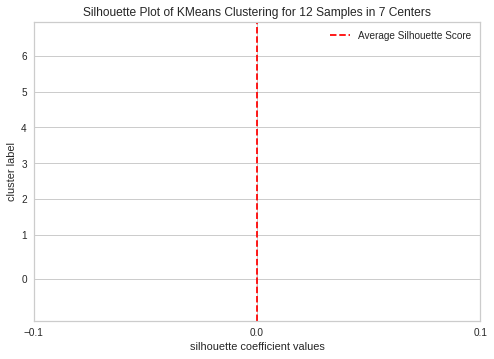

In [56]:
silhouette_score_analysis(8)

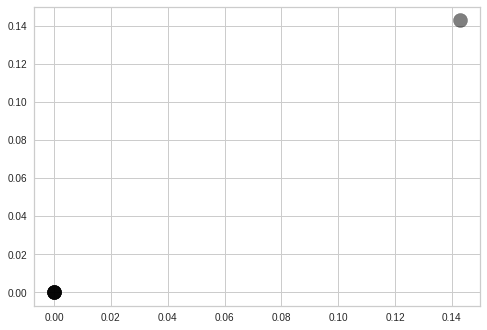

In [59]:
# looks like we can go with 6 clusters.

kmeans= KMeans(n_clusters=6, init= 'k-means++',max_iter=300, n_init=1)

kmeans.fit(X)

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [60]:
labels = kmeans.fit_predict(X)

In [69]:
# silhouette score of my clusters
print("Silhouette Coefficient: %0.3f"%silhouette_score(X, kmeans.labels_))

Silhouette Coefficient: 0.000


# **Hirarchical clustering**

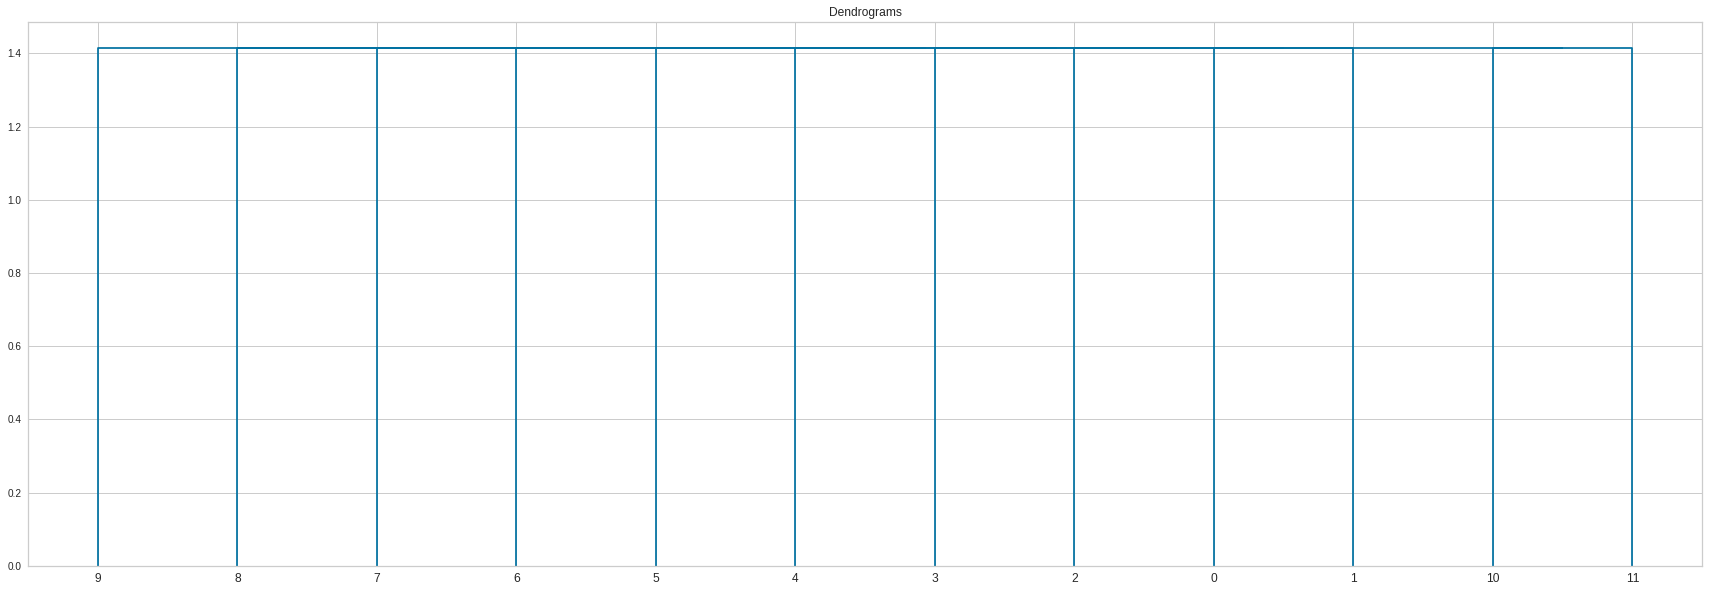

In [72]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(30,10))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X, method='ward'))

plt.axhline(y=180)

# **PCA**

In [73]:
from sklearn.decomposition import PCA

In [74]:
# function to understand the variance for different n_components
def pca_variance(n_components):
  pca= PCA(n_components= n_components)
  pca.fit(X)
  print(sum(pca.explained_variance_ratio_))

In [76]:
pca_variance(12)

1.0


In [77]:
pca = PCA(n_components=12)
pca.fit(X)

PCA(n_components=12)

Text(0.5, 1.0, 'No. of components VS Explained variance')

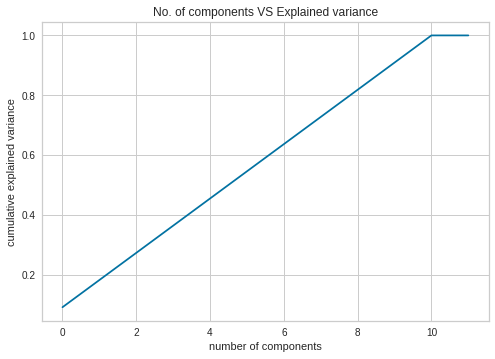

In [78]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title('No. of components VS Explained variance')

In [79]:
X_pca = pca.fit_transform(X)

In [80]:
X_pca.shape

(12, 12)

In [81]:
# fitting the k means algorithm on lower features

kmeans= KMeans(n_clusters=6, init= 'k-means++',max_iter=300, n_init=1)
kmeans.fit(X_pca)

KMeans(n_clusters=6, n_init=1)

In [82]:
print("Silhouette Coefficient:  %0.3f"%silhouette_score(X_pca, kmeans.labels_))

Silhouette Coefficient:  -0.000


In [83]:
#predict the labels of clusters.
label = kmeans.fit_predict(X_pca)

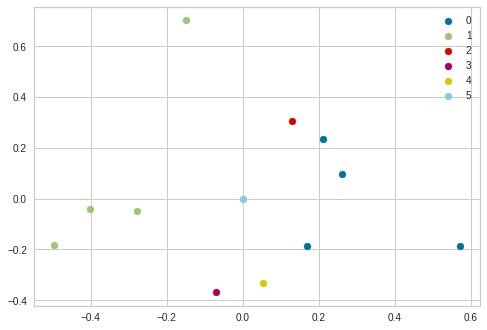

In [84]:
#Getting unique labels
u_labels = np.unique(label)
 
#plotting the results:
for i in u_labels:
    plt.scatter(X_pca[label == i , 0] , X_pca[label == i , 1] , label = i)
plt.legend()
plt.show()